In [1]:
import influxdb
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline
plt.rcParams['figure.figsize'] = [16, 9]

Populating the interactive namespace from numpy and matplotlib


In [3]:
# Access localhost:8088 and use database test5
c = influxdb.DataFrameClient(host="localhost", port=8088, database="influx_data")

# Data always stored in env_params table.  Grab all data.
q1 = "select * from env_params"
r = c.query(q1)

# Query returns dict of dataframes, so just grab dataframe from the env_params key
my_data_H1 = r['env_params']

In [4]:
my_data = my_data_H1
my_data.info()

export_csv = my_data.to_csv (r'export_dataframe.csv', index = None, header=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 257405 entries, 2018-12-21 16:50:10+00:00 to 2019-02-08 23:16:00+00:00
Data columns (total 12 columns):
client_request_time     257405 non-null object
co2eq_base              257405 non-null int64
co2eq_ppm               257405 non-null int64
dist_mm                 257405 non-null int64
light_lux               257405 non-null int64
pi_ip_address           257405 non-null object
rh_percent              224026 non-null float64
server_id               257405 non-null object
server_response_time    257405 non-null object
temp_c                  224026 non-null float64
tvoc_base               257405 non-null int64
tvoc_ppb                257405 non-null int64
dtypes: float64(2), int64(6), object(4)
memory usage: 25.5+ MB


In [5]:
# Check the column names
my_data.columns


Index(['client_request_time', 'co2eq_base', 'co2eq_ppm', 'dist_mm',
       'light_lux', 'pi_ip_address', 'rh_percent', 'server_id',
       'server_response_time', 'temp_c', 'tvoc_base', 'tvoc_ppb'],
      dtype='object')

In [7]:
df = my_data_H1
BS1_df = df.loc[(df['server_id'] == 'BS1')]
BS2_df = df.loc[(df['server_id'] == 'BS2')]
BS3_df = df.loc[(df['server_id'] == 'BS3')]
BS4_df = df.loc[(df['server_id'] == 'BS4')]
BS5_df = df.loc[(df['server_id'] == 'BS5')]
BS6_df = df.loc[(df['server_id'] == 'BS6')]


export_BS1 = BS1_df.to_csv(r'BS1_H1_w1.csv', index = None, header=True)
export_BS2 = BS2_df.to_csv(r'BS2_H1_w1.csv', index = None, header=True)
export_BS3 = BS3_df.to_csv(r'BS3_H1_w1.csv', index = None, header=True)
export_BS4 = BS4_df.to_csv(r'BS4_H1_w1.csv', index = None, header=True)
export_BS5 = BS5_df.to_csv(r'BS5_H1_w1.csv', index = None, header=True)
export_BS6 = BS6_df.to_csv(r'BS6_H1_w1.csv', index = None, header=True)


In [64]:
min(BS2_df['client_request_time'])

'2019-01-09T17:06:02Z'

server_id
BS1    AxesSubplot(0.125,0.2;0.775x0.68)
Name: co2eq_ppm, dtype: object

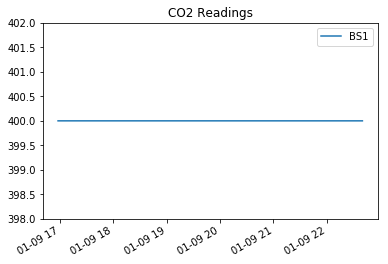

In [67]:
BS1_df.groupby('server_id')['co2eq_ppm'].plot(legend=True, title='CO2 Readings', ylim=(398,402))

server_id
BS1    AxesSubplot(0.125,0.2;0.775x0.68)
BS2    AxesSubplot(0.125,0.2;0.775x0.68)
BS3    AxesSubplot(0.125,0.2;0.775x0.68)
BS5    AxesSubplot(0.125,0.2;0.775x0.68)
Name: co2eq_base, dtype: object

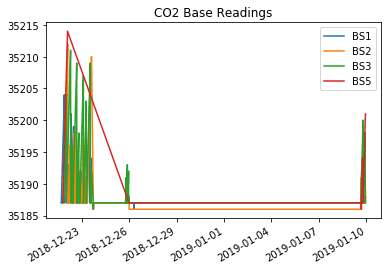

In [7]:
my_data.groupby('server_id')['co2eq_base'].plot(legend=True, title='CO2 Base Readings')

<class 'pandas.core.frame.DataFrame'>


server_id
BS1    AxesSubplot(0.125,0.2;0.775x0.68)
BS2    AxesSubplot(0.125,0.2;0.775x0.68)
BS3    AxesSubplot(0.125,0.2;0.775x0.68)
BS5    AxesSubplot(0.125,0.2;0.775x0.68)
Name: temp_c, dtype: object

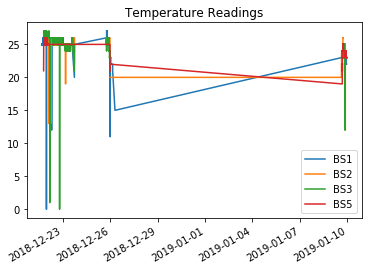

In [8]:
my_data.groupby('server_id')['temp_c'].plot(legend=True, title='Temperature Readings')

server_id
BS1    AxesSubplot(0.125,0.2;0.775x0.68)
BS2    AxesSubplot(0.125,0.2;0.775x0.68)
BS3    AxesSubplot(0.125,0.2;0.775x0.68)
BS5    AxesSubplot(0.125,0.2;0.775x0.68)
Name: rh_percent, dtype: object

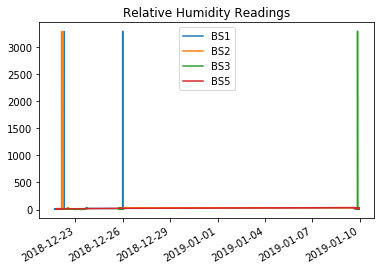

In [9]:
my_data.groupby('server_id')['rh_percent'].plot(legend=True, title='Relative Humidity Readings')

server_id
BS1    AxesSubplot(0.125,0.2;0.775x0.68)
BS2    AxesSubplot(0.125,0.2;0.775x0.68)
BS3    AxesSubplot(0.125,0.2;0.775x0.68)
BS5    AxesSubplot(0.125,0.2;0.775x0.68)
Name: dist_mm, dtype: object

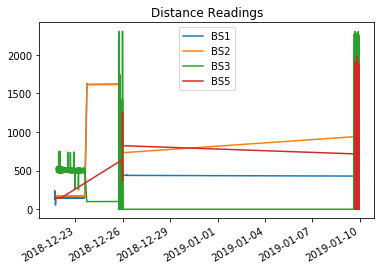

In [10]:
my_data.groupby('server_id')['dist_mm'].plot(legend=True, title='Distance Readings')

server_id
BS1    AxesSubplot(0.125,0.2;0.775x0.68)
BS2    AxesSubplot(0.125,0.2;0.775x0.68)
BS3    AxesSubplot(0.125,0.2;0.775x0.68)
BS5    AxesSubplot(0.125,0.2;0.775x0.68)
Name: tvoc_ppb, dtype: object

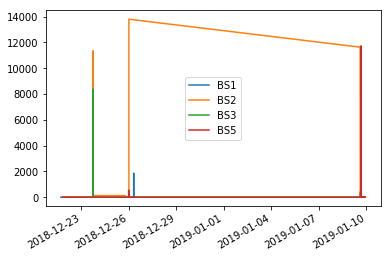

In [11]:
my_data.groupby('server_id')['tvoc_ppb'].plot(legend=True)

server_id
BS1    AxesSubplot(0.125,0.2;0.775x0.68)
BS2    AxesSubplot(0.125,0.2;0.775x0.68)
BS3    AxesSubplot(0.125,0.2;0.775x0.68)
BS5    AxesSubplot(0.125,0.2;0.775x0.68)
Name: tvoc_base, dtype: object

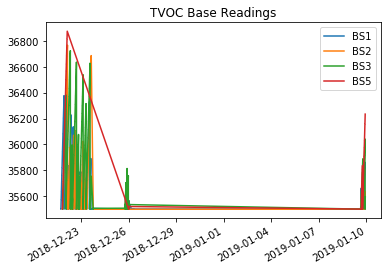

In [12]:
my_data.groupby('server_id')['tvoc_base'].plot(legend=True, title='TVOC Base Readings')

server_id
BS1    AxesSubplot(0.125,0.2;0.775x0.68)
BS2    AxesSubplot(0.125,0.2;0.775x0.68)
BS3    AxesSubplot(0.125,0.2;0.775x0.68)
BS5    AxesSubplot(0.125,0.2;0.775x0.68)
Name: light_lux, dtype: object

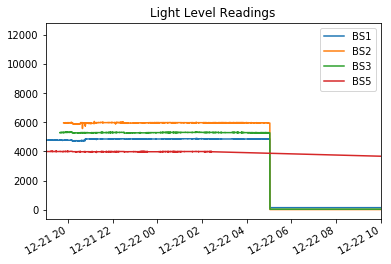

In [13]:
my_data.groupby('server_id')['light_lux'].plot(legend=True, title='Light Level Readings', xlim=('2018-12-21 19', '2018-12-22 10'))

In [21]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 169455 entries, 2018-11-23 14:46:20+00:00 to 2018-12-12 11:38:00+00:00
Data columns (total 12 columns):
client_request_time     169455 non-null object
co2eq_base              169455 non-null int64
co2eq_ppm               169455 non-null int64
dist_mm                 169455 non-null int64
light_lux               169455 non-null int64
pi_ip_address           169455 non-null object
rh_percent              136403 non-null float64
server_id               169455 non-null object
server_response_time    169455 non-null object
temp_c                  136403 non-null float64
tvoc_base               169455 non-null int64
tvoc_ppb                169455 non-null int64
dtypes: float64(2), int64(6), object(4)
memory usage: 16.8+ MB
